<a href="https://colab.research.google.com/github/HindJamal97/Machine_Learning/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# if wget is not installed, we suggest to run also the following code.
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=6a114e878796fbec6d0bf3ed5b83de431385abaf9e2c45de6ce62cd8c2959a74
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
url = 'https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download'
filename = wget.download(url)
print(filename)

CatsDogs.zip


In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1310 sha256=4b68b3dae67e911e5e972821bfe732557c2ed6bff3aba90e85c49bf32b332fcf
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [ ]:
import zipfile
with zipfile.ZipFile("CatsDogs.zip", 'r') as zip_ref:
    zip_ref.extractall(r'Downloads')

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=caeaccd20273062dcb7789e67710e7a2c00722b8f2fbdd85b2b626927c2869d0
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import os
import tqdm
import random
import scipy
import cv2
from pathlib import Path
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import optimizers

In [ ]:
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import zero_one_loss

In [ ]:
input_path=[]

label=[]

for class_name in os.listdir("/content/Downloads/CatsDogs"):
    for path in os.listdir("/content/Downloads/CatsDogs/"+class_name):
        if class_name == 'Cats':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("/content/Downloads/CatsDogs", class_name, path))
print(input_path[0], label[0])

/content/Downloads/CatsDogs/Cats/12275.jpg 0


In [ ]:
print(input_path[10], label[10])

/content/Downloads/CatsDogs/Cats/7579.jpg 0


In [ ]:
print(input_path[-10], label[-10])

/content/Downloads/CatsDogs/Dogs/4858.jpg 1


In [ ]:
len(input_path)

25000

In [ ]:
len(label)

25000

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   /content/Downloads/CatsDogs/Dogs/1146.jpg      1
1  /content/Downloads/CatsDogs/Dogs/10866.jpg      1
2   /content/Downloads/CatsDogs/Cats/2466.jpg      0
3   /content/Downloads/CatsDogs/Dogs/4338.jpg      1
4   /content/Downloads/CatsDogs/Dogs/3311.jpg      1

In [ ]:
df['images'].shape

(25000,)

In [ ]:
#One important step is the clearing of the data, to avoid considering empty images or files that are not images. 
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [ ]:
#they are images that are actually not represented (there is no cat or no dog to be represented)
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l


['/content/Downloads/CatsDogs/Cats/666.jpg',
 '/content/Downloads/CatsDogs/Dogs/11702.jpg']

In [ ]:
# delete db files
df = df[df['images']!='/content/Downloads/CatsDogs/Dogs/11702.jpg']
df = df[df['images']!='/content/Downloads/CatsDogs/Cats/666.jpg']
len(df)

24998

In [ ]:
df['label']

0        1
1        1
2        0
3        1
4        1
        ..
24995    0
24996    1
24997    0
24998    0
24999    0
Name: label, Length: 24998, dtype: int64

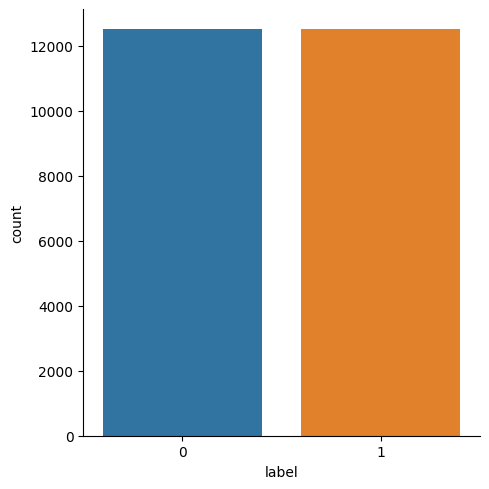

In [ ]:
import seaborn as sns
sns.catplot(x='label',data=df,kind="count")

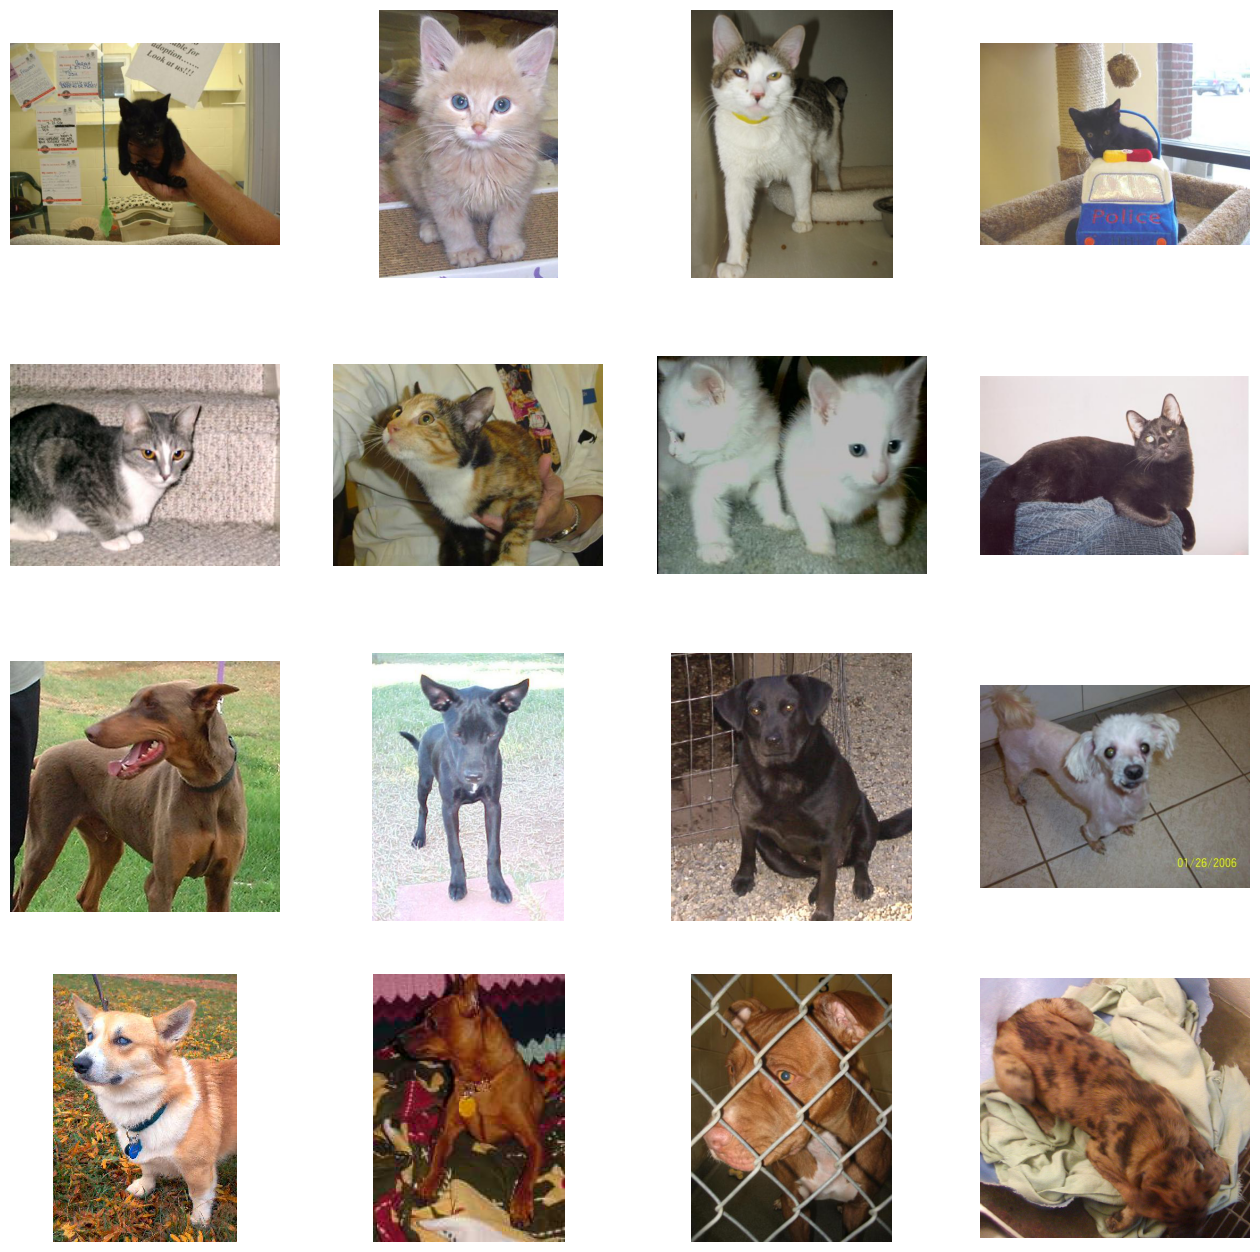

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
  
cat_dir = os.path.join('/content/Downloads/CatsDogs/Cats')
dog_dir = os.path.join('/content/Downloads/CatsDogs/Dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)
  
pic_index = 210
  
cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]
  
for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()

In [ ]:
df['label'] = df['label'].astype('str')  #this is useful for when we will need the values expressed as a string.

In [ ]:
df.head()

images label
0   /content/Downloads/CatsDogs/Dogs/1146.jpg     1
1  /content/Downloads/CatsDogs/Dogs/10866.jpg     1
2   /content/Downloads/CatsDogs/Cats/2466.jpg     0
3   /content/Downloads/CatsDogs/Dogs/4338.jpg     1
4   /content/Downloads/CatsDogs/Dogs/3311.jpg     1

In [ ]:
df.tail()

images label
24995   /content/Downloads/CatsDogs/Cats/3976.jpg     0
24996   /content/Downloads/CatsDogs/Dogs/8099.jpg     1
24997  /content/Downloads/CatsDogs/Cats/11323.jpg     0
24998   /content/Downloads/CatsDogs/Cats/9376.jpg     0
24999   /content/Downloads/CatsDogs/Cats/9870.jpg     0

In [ ]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
train_df

images label
15146   /content/Downloads/CatsDogs/Dogs/8231.jpg     1
6962    /content/Downloads/CatsDogs/Dogs/1286.jpg     1
8526   /content/Downloads/CatsDogs/Cats/11315.jpg     0
20041   /content/Downloads/CatsDogs/Cats/7683.jpg     0
609     /content/Downloads/CatsDogs/Dogs/8363.jpg     1
...                                           ...   ...
1885    /content/Downloads/CatsDogs/Dogs/8964.jpg     1
1824    /content/Downloads/CatsDogs/Dogs/1768.jpg     1
21309   /content/Downloads/CatsDogs/Dogs/4710.jpg     1
18774   /content/Downloads/CatsDogs/Cats/4185.jpg     0
12502   /content/Downloads/CatsDogs/Dogs/2350.jpg     1

[17998 rows x 2 columns]

In [ ]:
test_df

images label
6868    /content/Downloads/CatsDogs/Cats/1281.jpg     0
22911    /content/Downloads/CatsDogs/Cats/711.jpg     0
9668    /content/Downloads/CatsDogs/Dogs/8589.jpg     1
13638  /content/Downloads/CatsDogs/Cats/10992.jpg     0
23338  /content/Downloads/CatsDogs/Cats/10139.jpg     0
...                                           ...   ...
8670    /content/Downloads/CatsDogs/Cats/5896.jpg     0
11839   /content/Downloads/CatsDogs/Cats/5842.jpg     0
4013   /content/Downloads/CatsDogs/Dogs/12188.jpg     1
16238   /content/Downloads/CatsDogs/Cats/9001.jpg     0
695     /content/Downloads/CatsDogs/Cats/3763.jpg     0

[5000 rows x 2 columns]

In [ ]:
val_df

images label
14852  /content/Downloads/CatsDogs/Dogs/11337.jpg     1
5817   /content/Downloads/CatsDogs/Cats/10731.jpg     0
20766   /content/Downloads/CatsDogs/Dogs/6456.jpg     1
5768    /content/Downloads/CatsDogs/Cats/8516.jpg     0
7018    /content/Downloads/CatsDogs/Cats/8484.jpg     0
...                                           ...   ...
5204    /content/Downloads/CatsDogs/Cats/1432.jpg     0
14950   /content/Downloads/CatsDogs/Dogs/5096.jpg     1
8174    /content/Downloads/CatsDogs/Cats/5150.jpg     0
8760    /content/Downloads/CatsDogs/Cats/6476.jpg     0
20929   /content/Downloads/CatsDogs/Dogs/6064.jpg     1

[2000 rows x 2 columns]

In [ ]:
total_train = train_df.shape[0]
total_test = test_df.shape[0]
total_validate = val_df.shape[0]

In [ ]:
print('Train shape:')
print(train_df.shape)
print('Test shape')
print(test_df.shape)
print('Validation shape')
print(val_df.shape)

Train shape:
(17998, 2)
Test shape
(5000, 2)
Validation shape
(2000, 2)


In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 10, # augmention of images to avoid overfitting
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
)

test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
print("For the training set we") 
train_iterator = train_generator.flow_from_dataframe(
    train_df, 
    x_col='images', 
    y_col='label', 
    target_size=Image_Size, 
    color_mode= 'rgb',
    batch_size=32, 
    shuffle=True,
    class_mode='binary'   
)

print("For the test set we") 
test_iterator = test_generator.flow_from_dataframe(
    test_df, 
    x_col='images', 
    y_col='label', 
    target_size=Image_Size,
    color_mode= 'rgb',
    batch_size=32,     
    class_mode='binary',
    shuffle=False,
)

print("For the validation set we") 
validation_iterator = train_generator.flow_from_dataframe(
    val_df, 
    x_col='images', 
    y_col='label', 
    target_size=(Image_Size), 
    color_mode= 'rgb',
    batch_size=32, seed = 87, 
    shuffle=True,
    class_mode='binary'
)

For the training set we
Found 17998 validated image filenames belonging to 2 classes.
For the test set we
Found 5000 validated image filenames belonging to 2 classes.
For the validation set we
Found 2000 validated image filenames belonging to 2 classes.


In [ ]:
print(test_iterator.class_indices)
print(test_iterator.n)
print(len(test_iterator))

{'0': 0, '1': 1}
5000
157


Found 1 validated image filenames belonging to 1 classes.


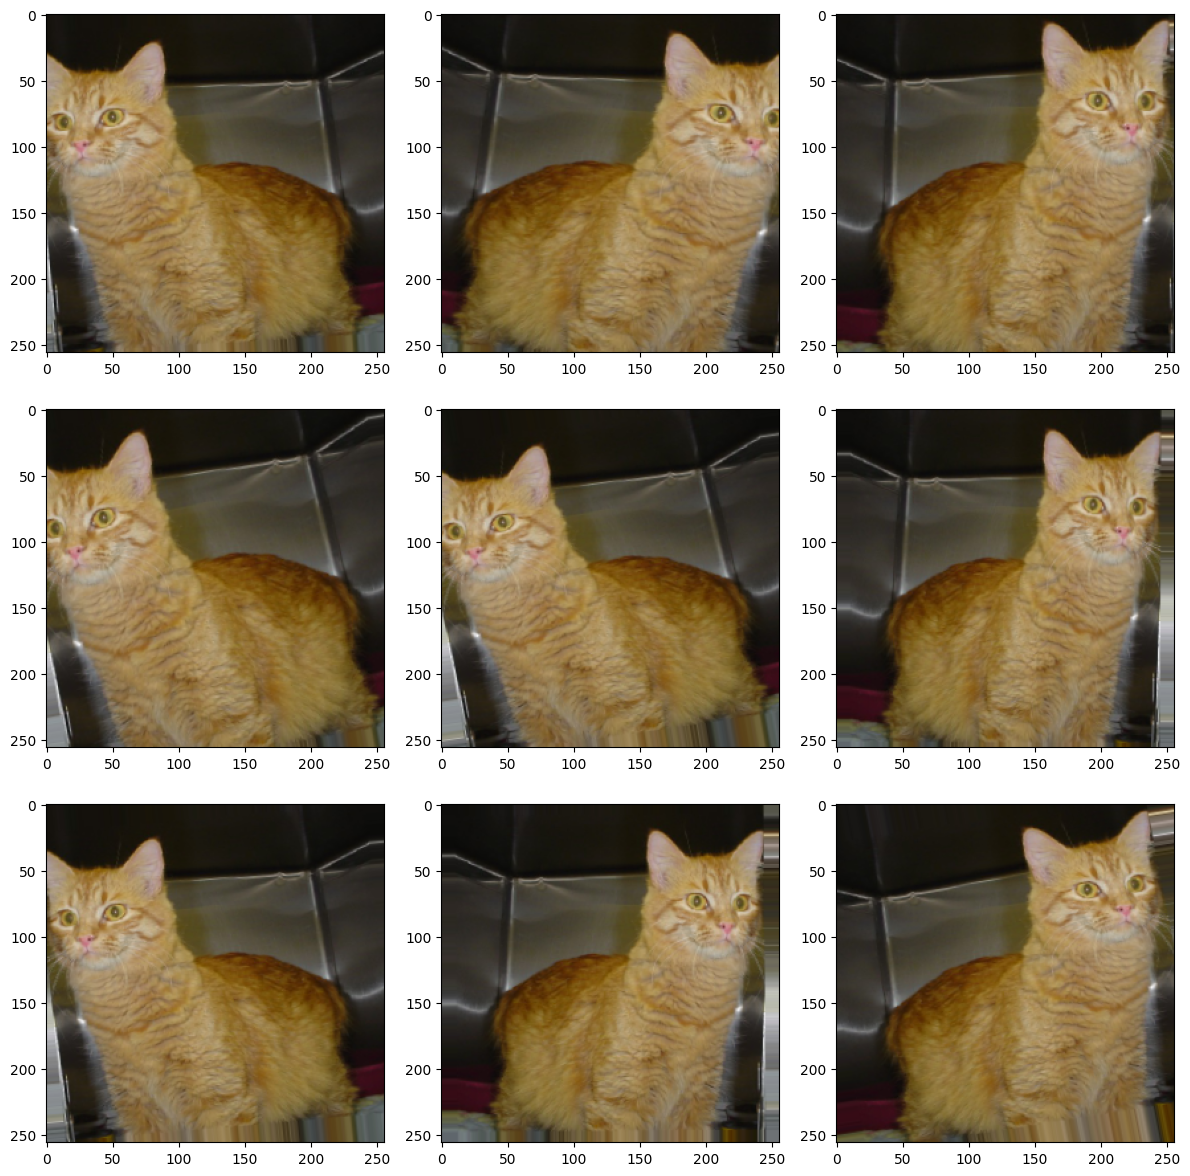

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_generator.flow_from_dataframe(
    example_df, 
    "../input/train/train/", 
    x_col='images', 
    y_col='label',
    class_mode='categorical'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.utils import plot_model
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
#1VGG
model1 = Sequential([
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu', input_shape=(Image_Width,Image_Height,3)),
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Flatten(),
                    Dense(128, use_bias=False, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      864       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777216  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

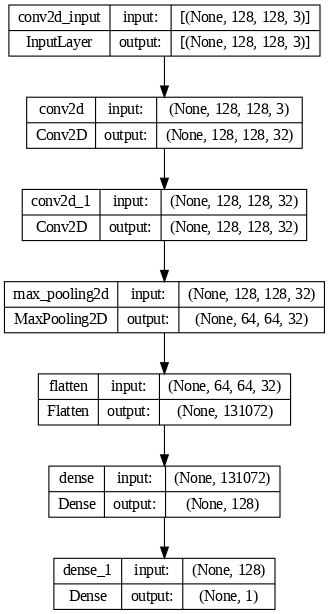

In [ ]:
plot_model(model1, show_shapes = True, expand_nested = True,dpi = 80)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 22.4 MB/s eta 0:00:00


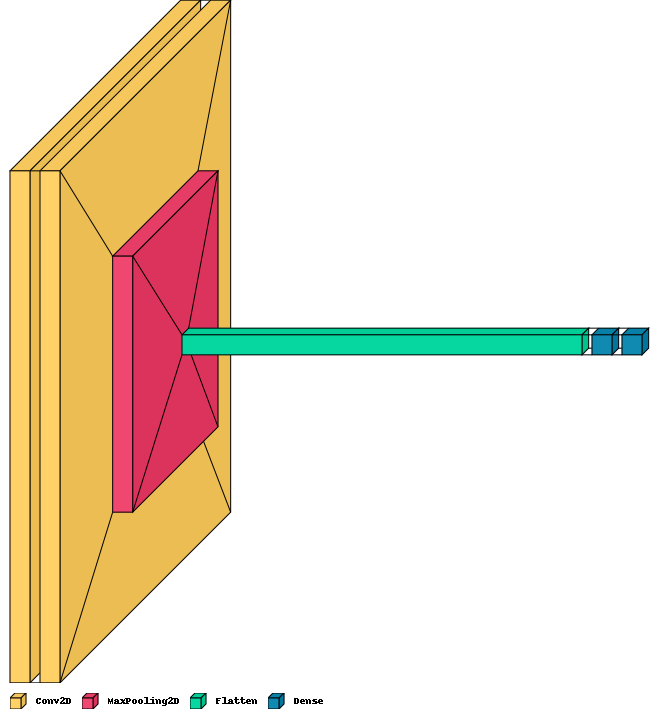

In [ ]:
import visualkeras
visualkeras.layered_view(model1, legend=True) 

In [ ]:
history = model1.fit(train_iterator, epochs=10, validation_data=validation_iterator, validation_steps=total_validate//32, steps_per_epoch=total_train//32)

Epoch 1/10
562/562 [==============================] - 170s 274ms/step - loss: 0.6932 - accuracy: 0.6196 - val_loss: 0.5921 - val_accuracy: 0.6840
Epoch 2/10
562/562 [==============================] - 133s 237ms/step - loss: 0.5552 - accuracy: 0.7107 - val_loss: 0.5384 - val_accuracy: 0.7177
Epoch 3/10
562/562 [==============================] - 133s 237ms/step - loss: 0.5042 - accuracy: 0.7548 - val_loss: 0.5257 - val_accuracy: 0.7364
Epoch 4/10
562/562 [==============================] - 140s 248ms/step - loss: 0.4716 - accuracy: 0.7746 - val_loss: 0.4829 - val_accuracy: 0.7641
Epoch 5/10
562/562 [==============================] - 140s 249ms/step - loss: 0.4467 - accuracy: 0.7932 - val_loss: 0.4872 - val_accuracy: 0.7702
Epoch 6/10
562/562 [==============================] - 140s 250ms/step - loss: 0.4270 - accuracy: 0.8026 - val_loss: 0.5086 - val_accuracy: 0.7641
Epoch 7/10
562/562 [==============================] - 141s 251ms/step - loss: 0.4110 - accuracy: 0.8120 - val_loss: 0.4698 -

In [ ]:
results = model1.evaluate(test_iterator)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

157/157 [==============================] - 23s 150ms/step - loss: 0.4448 - accuracy: 0.8126
    Test Loss: 0.44483
Test Accuracy: 81.26%


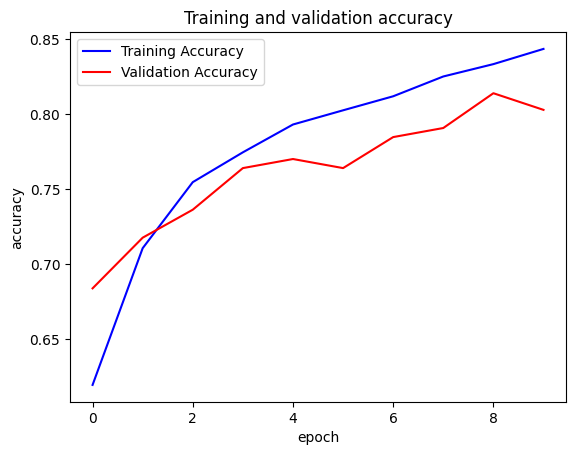

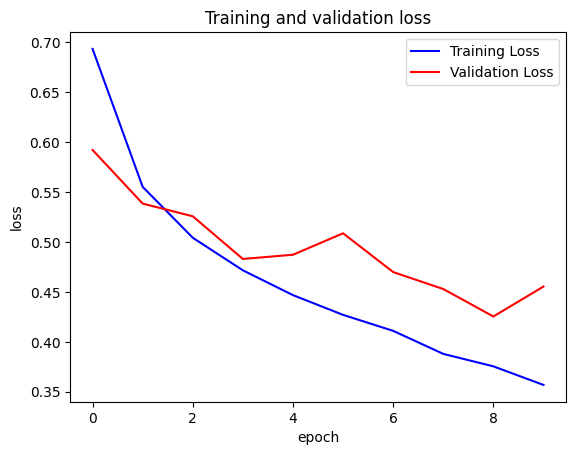

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predictions = (model1.predict(test_iterator) >= 0.5).astype(np.int)

157/157 [==============================] - 16s 101ms/step


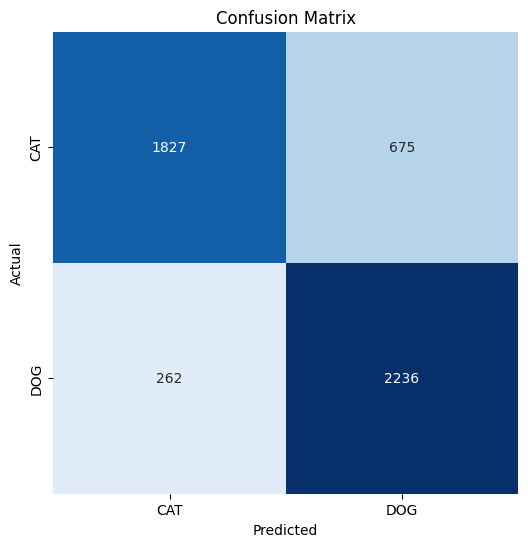

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.87      0.73      0.80      2502
         DOG       0.77      0.90      0.83      2498

    accuracy                           0.81      5000
   macro avg       0.82      0.81      0.81      5000
weighted avg       0.82      0.81      0.81      5000



In [ ]:
cm = confusion_matrix(test_iterator.labels, predictions, labels=[0, 1])
clr = classification_report(test_iterator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
cnn_loss=[]
zo_loss = zero_one_loss(test_iterator.labels, predictions)
cnn_loss.append(zo_loss)

In [ ]:
print("Zero-one Loss: ", zo_loss)

Zero-one Loss:  0.1874


In [ ]:
cnn_loss 

[0.1874]

In [ ]:
#2VGG
model2 = Sequential([
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu', input_shape=(Image_Width,Image_Height,3)),
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Flatten(),
                    Dense(128, use_bias=False, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      864       
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18432     
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        36864     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

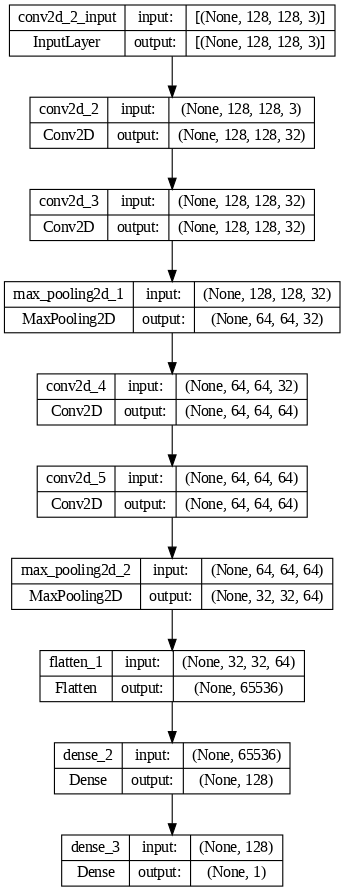

In [ ]:
plot_model(model2, show_shapes = True,expand_nested = True,dpi = 80)

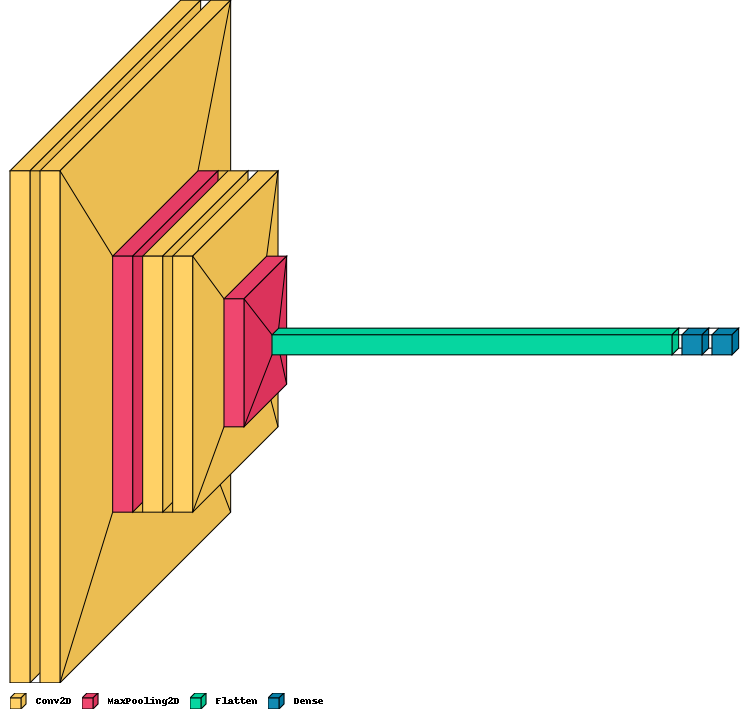

In [ ]:
visualkeras.layered_view(model2, legend=True) 

In [ ]:
history = model2.fit(train_iterator, epochs=10, validation_data=validation_iterator, validation_steps=total_validate//32, steps_per_epoch=total_train//32)

Epoch 1/10
562/562 [==============================] - 147s 258ms/step - loss: 0.6938 - accuracy: 0.5573 - val_loss: 0.6091 - val_accuracy: 0.6774
Epoch 2/10
562/562 [==============================] - 143s 255ms/step - loss: 0.5969 - accuracy: 0.6767 - val_loss: 0.5365 - val_accuracy: 0.7324
Epoch 3/10
562/562 [==============================] - 145s 257ms/step - loss: 0.5086 - accuracy: 0.7476 - val_loss: 0.4810 - val_accuracy: 0.7646
Epoch 4/10
562/562 [==============================] - 137s 243ms/step - loss: 0.4555 - accuracy: 0.7858 - val_loss: 0.4584 - val_accuracy: 0.7868
Epoch 5/10
562/562 [==============================] - 144s 257ms/step - loss: 0.4102 - accuracy: 0.8132 - val_loss: 0.4283 - val_accuracy: 0.8019
Epoch 6/10
562/562 [==============================] - 144s 256ms/step - loss: 0.3755 - accuracy: 0.8330 - val_loss: 0.3844 - val_accuracy: 0.8271
Epoch 7/10
562/562 [==============================] - 136s 242ms/step - loss: 0.3437 - accuracy: 0.8494 - val_loss: 0.3797 -

In [ ]:
results = model2.evaluate(test_iterator)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

157/157 [==============================] - 16s 100ms/step - loss: 0.3234 - accuracy: 0.8658
    Test Loss: 0.32339
Test Accuracy: 86.58%


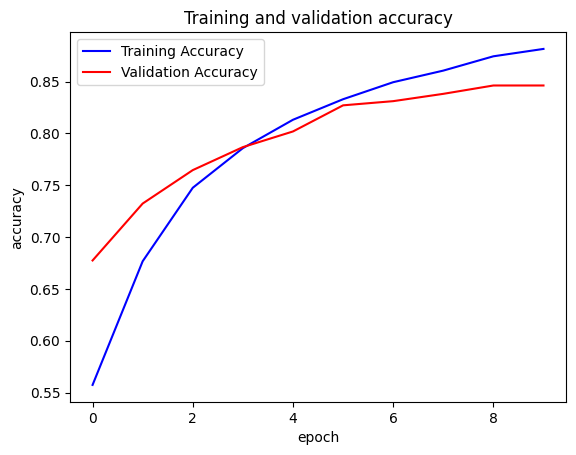

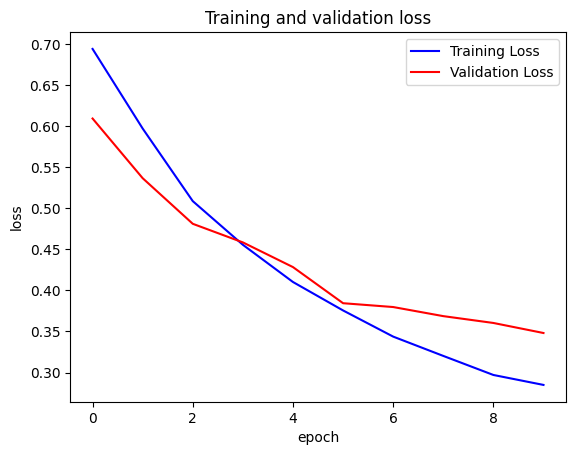

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predictions = (model2.predict(test_iterator) >= 0.5).astype(np.int)

157/157 [==============================] - 15s 98ms/step


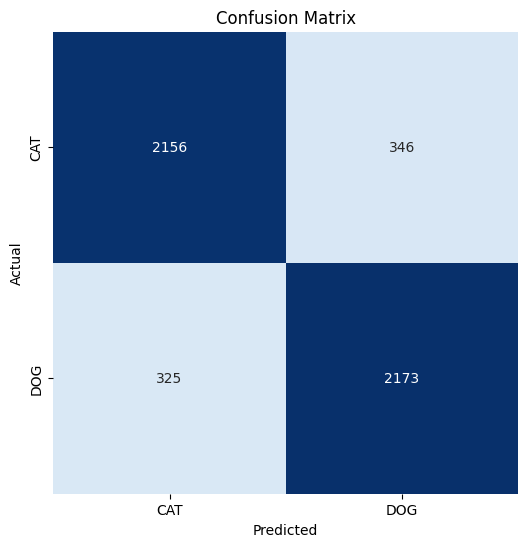

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.87      0.86      0.87      2502
         DOG       0.86      0.87      0.87      2498

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [ ]:
cm = confusion_matrix(test_iterator.labels, predictions, labels=[0, 1])
clr = classification_report(test_iterator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
zo_loss2 = zero_one_loss(test_iterator.labels, predictions)
cnn_loss.append(zo_loss2)

In [ ]:
print("Zero-one Loss: ", zo_loss2)

Zero-one Loss:  0.13419999999999999


In [ ]:
cnn_loss

[0.1874, 0.13419999999999999]

In [ ]:
#3VGG
model3 = Sequential([
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu', input_shape=(Image_Width,Image_Height,3)),
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Flatten(),
                    Dense(128, use_bias=False, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      864       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      9216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18432     
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        36864     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

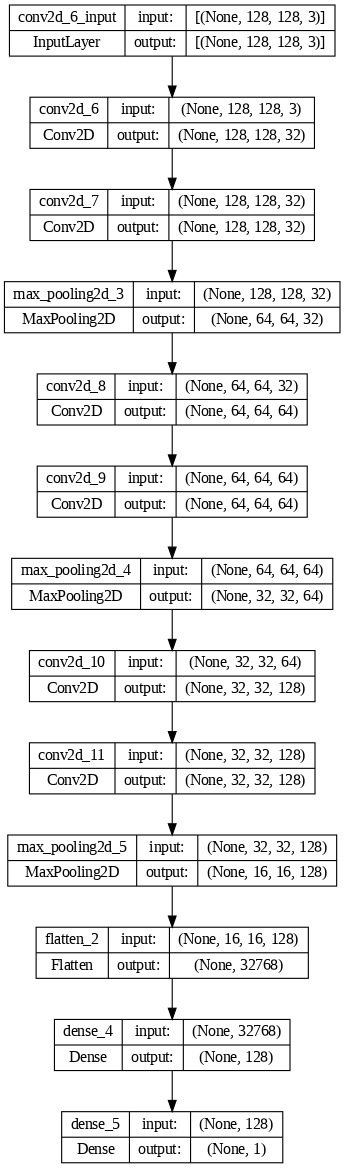

In [ ]:
plot_model(model3, show_shapes = True,expand_nested = True,dpi = 80)

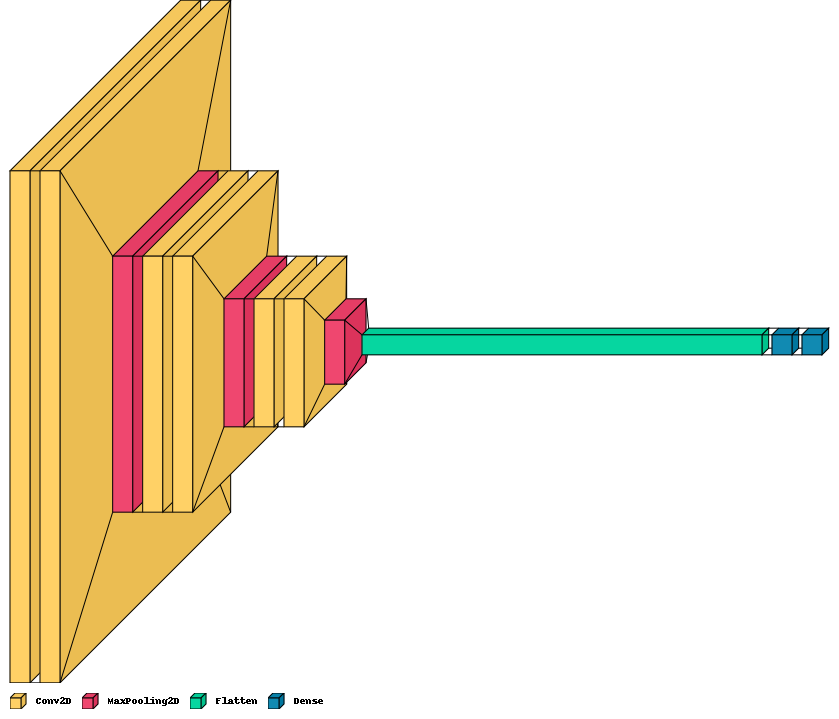

In [ ]:
visualkeras.layered_view(model3, legend=True) 

In [ ]:
history = model3.fit(train_iterator, epochs=10, validation_data=validation_iterator, validation_steps=total_validate//32, steps_per_epoch=total_train//32)

Epoch 1/10
562/562 [==============================] - 147s 258ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6751 - val_accuracy: 0.6230
Epoch 2/10
562/562 [==============================] - 137s 244ms/step - loss: 0.6591 - accuracy: 0.6092 - val_loss: 0.6581 - val_accuracy: 0.6275
Epoch 3/10
562/562 [==============================] - 144s 256ms/step - loss: 0.6217 - accuracy: 0.6585 - val_loss: 0.5939 - val_accuracy: 0.6951
Epoch 4/10
562/562 [==============================] - 146s 260ms/step - loss: 0.5732 - accuracy: 0.7054 - val_loss: 0.5395 - val_accuracy: 0.7349
Epoch 5/10
562/562 [==============================] - 137s 244ms/step - loss: 0.5031 - accuracy: 0.7548 - val_loss: 0.4945 - val_accuracy: 0.7631
Epoch 6/10
562/562 [==============================] - 137s 243ms/step - loss: 0.4376 - accuracy: 0.7966 - val_loss: 0.4323 - val_accuracy: 0.7969
Epoch 7/10
562/562 [==============================] - 137s 243ms/step - loss: 0.3839 - accuracy: 0.8297 - val_loss: 0.3858 -

In [ ]:
results = model3.evaluate(test_iterator)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

157/157 [==============================] - 16s 101ms/step - loss: 0.3180 - accuracy: 0.8674
    Test Loss: 0.31798
Test Accuracy: 86.74%


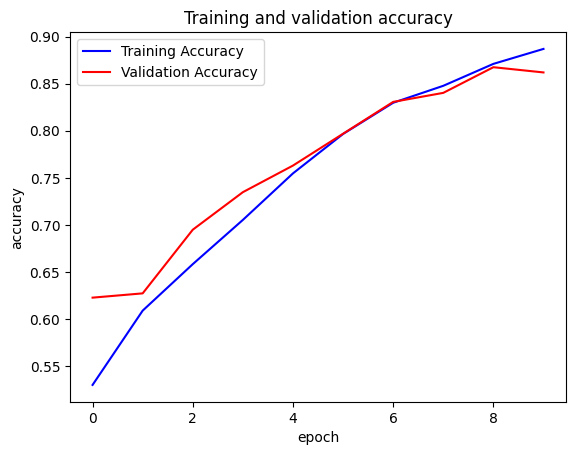

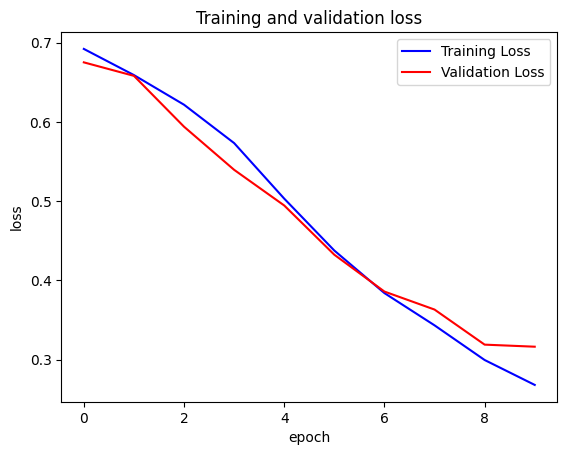

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predictions = (model3.predict(test_iterator) >= 0.5).astype(np.int)

157/157 [==============================] - 15s 97ms/step


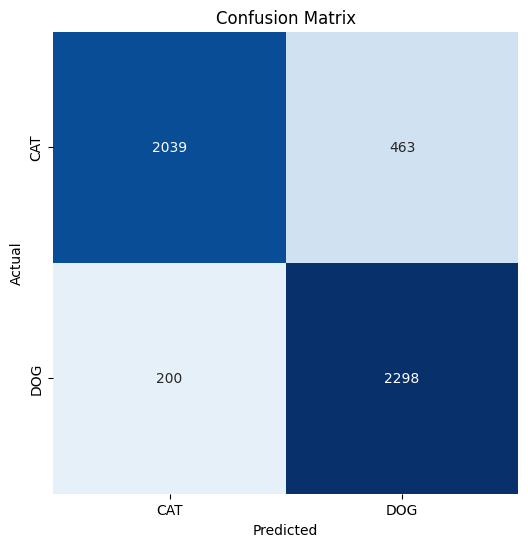

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.91      0.81      0.86      2502
         DOG       0.83      0.92      0.87      2498

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [ ]:
cm = confusion_matrix(test_iterator.labels, predictions, labels=[0, 1])
clr = classification_report(test_iterator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
# ZERO ONE LOSS

In [ ]:
zo_loss3 = zero_one_loss(test_iterator.labels, predictions)
cnn_loss.append(zo_loss3)

In [ ]:
print("Zero-one Loss: ", zo_loss3)

Zero-one Loss:  0.13260000000000005


In [ ]:
cnn_loss

[0.1874, 0.13419999999999999, 0.13260000000000005]

In [ ]:
#3VGG with dropout and Bacht
model4 = Sequential([
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu', input_shape=(Image_Width,Image_Height,3)),
                    BatchNormalization(),
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128, use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      864       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      9216      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

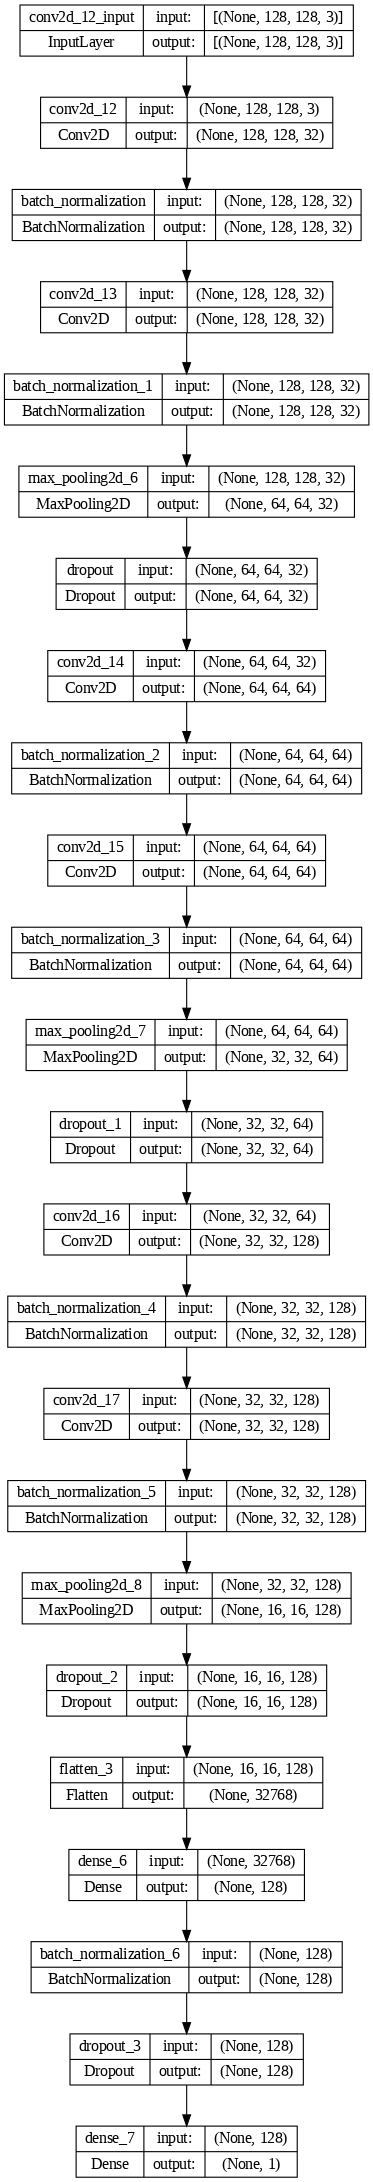

In [ ]:
plot_model(model4, show_shapes = True,expand_nested = True,dpi = 80)

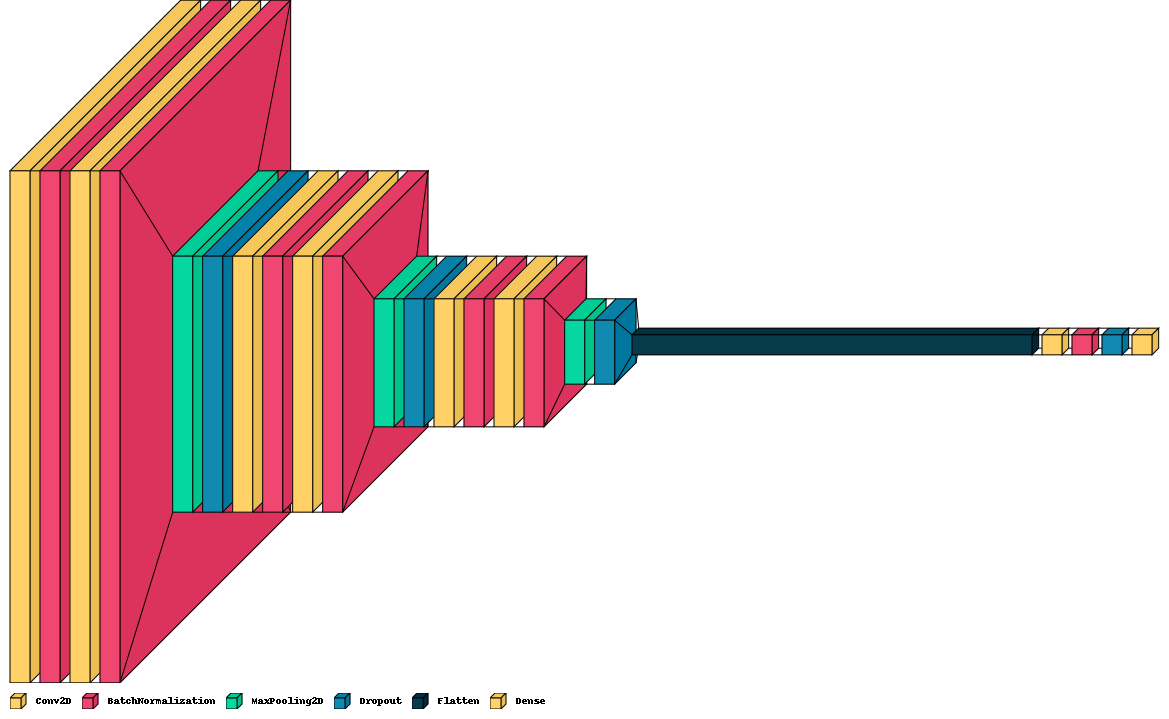

In [ ]:
visualkeras.layered_view(model4, legend=True) 

In [ ]:
history = model4.fit(train_iterator, epochs=10, validation_data=validation_iterator, validation_steps=total_validate//32, steps_per_epoch=total_train//32)

Epoch 1/10
562/562 [==============================] - 155s 267ms/step - loss: 0.6858 - accuracy: 0.6351 - val_loss: 0.6506 - val_accuracy: 0.5958
Epoch 2/10
562/562 [==============================] - 142s 253ms/step - loss: 0.5453 - accuracy: 0.7181 - val_loss: 0.5348 - val_accuracy: 0.7218
Epoch 3/10
562/562 [==============================] - 151s 269ms/step - loss: 0.4756 - accuracy: 0.7717 - val_loss: 0.4519 - val_accuracy: 0.8004
Epoch 4/10
562/562 [==============================] - 151s 268ms/step - loss: 0.4142 - accuracy: 0.8099 - val_loss: 0.4461 - val_accuracy: 0.7933
Epoch 5/10
562/562 [==============================] - 151s 269ms/step - loss: 0.3616 - accuracy: 0.8396 - val_loss: 0.4158 - val_accuracy: 0.8140
Epoch 6/10
562/562 [==============================] - 150s 267ms/step - loss: 0.3163 - accuracy: 0.8624 - val_loss: 0.3612 - val_accuracy: 0.8422
Epoch 7/10
562/562 [==============================] - 151s 269ms/step - loss: 0.2798 - accuracy: 0.8812 - val_loss: 0.3229 -

In [ ]:
results = model4.evaluate(test_iterator)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

157/157 [==============================] - 17s 108ms/step - loss: 0.2324 - accuracy: 0.9014
    Test Loss: 0.23237
Test Accuracy: 90.14%


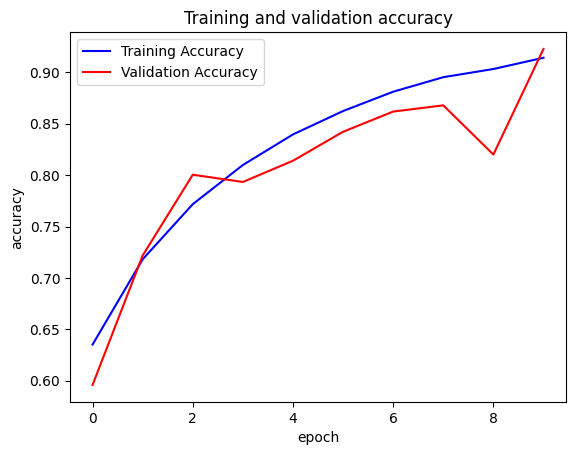

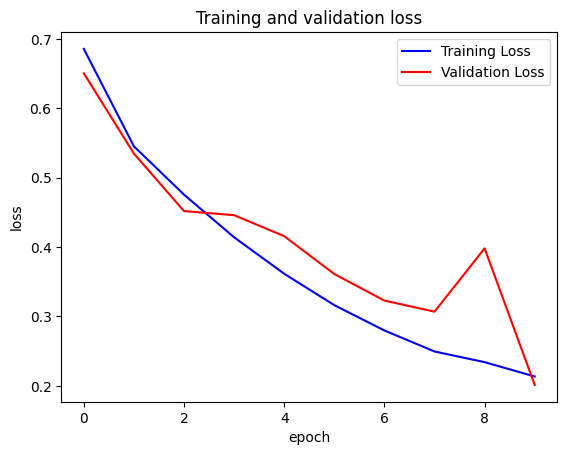

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predictions = (model4.predict(test_iterator) >= 0.5).astype(np.int)

157/157 [==============================] - 16s 101ms/step


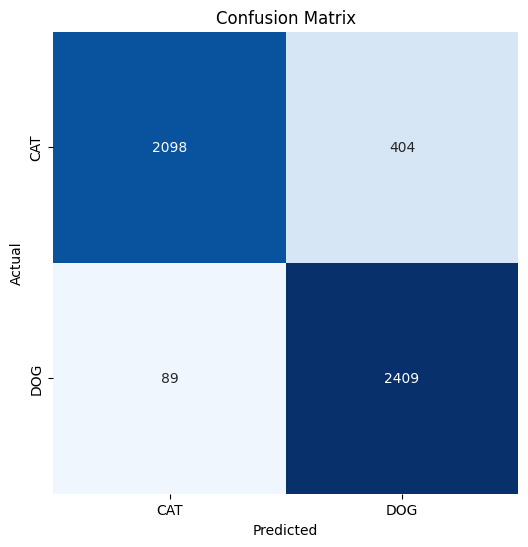

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.96      0.84      0.89      2502
         DOG       0.86      0.96      0.91      2498

    accuracy                           0.90      5000
   macro avg       0.91      0.90      0.90      5000
weighted avg       0.91      0.90      0.90      5000



In [ ]:
cm = confusion_matrix(test_iterator.labels, predictions, labels=[0, 1])
clr = classification_report(test_iterator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
zo_loss4 = zero_one_loss(test_iterator.labels, predictions)
cnn_loss.append(zo_loss4)

In [ ]:
print("Zero-one Loss: ", zo_loss4)

Zero-one Loss:  0.09860000000000002


In [ ]:
cnn_loss

[0.1874, 0.13419999999999999, 0.13260000000000005, 0.09860000000000002]

In [ ]:
df_cnn_loss = pd.DataFrame(
columns = ['type', 'zero_one']
)

types = ["1VGG","2VGG","3VGG", "3VGG-drop-norm"]
df_cnn_loss = pd.DataFrame(data = [types,cnn_loss], index = ['types', 'zero_one']).T

In [ ]:
df_cnn_loss

types zero_one
0            1VGG   0.1874
1            2VGG   0.1342
2            3VGG   0.1326
3  3VGG-drop-norm   0.0986

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline

In [ ]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.3 MB/s eta 0:00:00


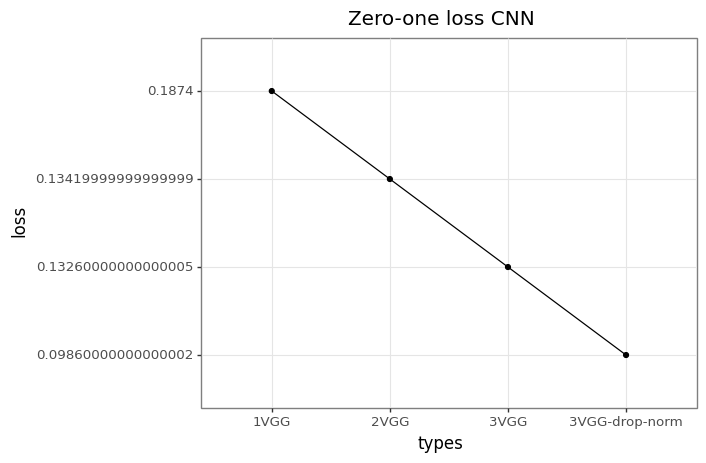

<ggplot: (8770655060518)>

In [ ]:
ggplot(df_cnn_loss, aes(x='types', y='zero_one',group=1)) + \
    geom_point() + \
    geom_line() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss CNN") + ylab("loss")

In [ ]:
#Cross validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
i = 1
for train_df, test_df in kf.split(input_path, label):
    print("iteration ", i)
    print(train_df, " having :" , len(train_df))
    print(test_df, " having :" , len(test_df))
    print("-------------------------")
    i += 1

iteration  1
[ 5000  5001  5002 ... 24997 24998 24999]  having : 20000
[   0    1    2 ... 4997 4998 4999]  having : 5000
-------------------------
iteration  2
[    0     1     2 ... 24997 24998 24999]  having : 20000
[5000 5001 5002 ... 9997 9998 9999]  having : 5000
-------------------------
iteration  3
[    0     1     2 ... 24997 24998 24999]  having : 20000
[10000 10001 10002 ... 14997 14998 14999]  having : 5000
-------------------------
iteration  4
[    0     1     2 ... 24997 24998 24999]  having : 20000
[15000 15001 15002 ... 19997 19998 19999]  having : 5000
-------------------------
iteration  5
[    0     1     2 ... 19997 19998 19999]  having : 20000
[20000 20001 20002 ... 24997 24998 24999]  having : 5000
-------------------------


In [ ]:
# Define k-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_df, test_df in kfold.split(input_path, label):

  # Define the model architecture
    model = Sequential([
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu', input_shape=(Image_Width,Image_Height,3)),
                    BatchNormalization(),
                    Conv2D(32, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Conv2D(64, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Conv2D(128, (3,3), padding = "same", use_bias=False, activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128, use_bias=False, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

  # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(train_iterator, epochs=10, validation_data=validation_iterator, validation_steps=total_validate//32, steps_per_epoch=total_train//32)

  # Generate generalization metrics
    scores = model.evaluate(test_iterator)
    predictions = (model.predict(test_iterator) >= 0.5).astype(np.int)
    zero_oneloss = zero_one_loss(test_iterator.labels, predictions)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {zero_oneloss}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(zero_oneloss*100)
    

  # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
562/562 [==============================] - 174s 302ms/step - loss: 0.6688 - accuracy: 0.6507 - val_loss: 0.5807 - val_accuracy: 0.6996
Epoch 2/10
562/562 [==============================] - 153s 272ms/step - loss: 0.5147 - accuracy: 0.7458 - val_loss: 0.5205 - val_accuracy: 0.7480
Epoch 3/10
562/562 [==============================] - 145s 258ms/step - loss: 0.4363 - accuracy: 0.7954 - val_loss: 0.4472 - val_accuracy: 0.7883
Epoch 4/10
562/562 [==============================] - 151s 268ms/step - loss: 0.3830 - accuracy: 0.8315 - val_loss: 0.5446 - val_accuracy: 0.7686
Epoch 5/10
562/562 [==============================] - 144s 257ms/step - loss: 0.3583 - accuracy: 0.8439 - val_loss: 0.3561 - val_accuracy: 0.8427
Epoch 6/10
562/562 [==============================] - 146s 259ms/step - loss: 0.3040 - accuracy: 0.8711 - val_loss: 0.3861 - val_accuracy: 0.8367
Epoch 7/10
562/562 [=======

In [ ]:
# == Average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 90.95600008964539
> Loss: 9.044
------------------------------------------------------------------------


In [ ]:
#Additional approach!! MobileNetV2

In [ ]:
base_model = MobileNetV2(input_shape=(Image_Width,Image_Height,3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

Model = Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
Model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = Model.evaluate(test_iterator, steps = validation_steps)

20/20 [==============================] - 10s 96ms/step - loss: 0.7744 - accuracy: 0.5594


In [ ]:
history = Model.fit(train_iterator,
                    epochs = initial_epochs,
                    validation_data=validation_iterator)
acc = history.history['accuracy']
print(acc)

Epoch 1/10
563/563 [==============================] - 144s 250ms/step - loss: 0.2796 - accuracy: 0.8708 - val_loss: 0.1585 - val_accuracy: 0.9330
Epoch 2/10
563/563 [==============================] - 136s 242ms/step - loss: 0.1367 - accuracy: 0.9437 - val_loss: 0.1255 - val_accuracy: 0.9455
Epoch 3/10
563/563 [==============================] - 136s 242ms/step - loss: 0.1196 - accuracy: 0.9500 - val_loss: 0.1194 - val_accuracy: 0.9535
Epoch 4/10
563/563 [==============================] - 136s 241ms/step - loss: 0.1121 - accuracy: 0.9550 - val_loss: 0.1114 - val_accuracy: 0.9525
Epoch 5/10
563/563 [==============================] - 136s 241ms/step - loss: 0.1085 - accuracy: 0.9557 - val_loss: 0.1057 - val_accuracy: 0.9520
Epoch 6/10
563/563 [==============================] - 141s 251ms/step - loss: 0.1041 - accuracy: 0.9568 - val_loss: 0.1065 - val_accuracy: 0.9575
Epoch 7/10
563/563 [==============================] - 136s 241ms/step - loss: 0.1010 - accuracy: 0.9586 - val_loss: 0.0955 -

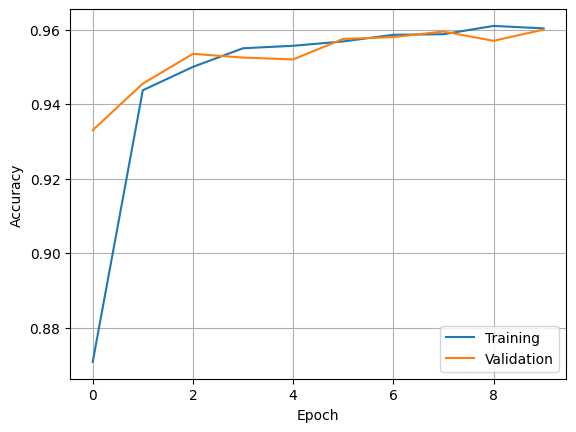

157/157 [==============================] - 17s 106ms/step - loss: 0.0818 - accuracy: 0.9678
Loss: 0.08175459504127502
Accuracy: 0.9678000211715698


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = Model.evaluate(test_iterator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [ ]:
predictions = (Model.predict(test_iterator) >= 0.5).astype(np.int)

157/157 [==============================] - 17s 106ms/step


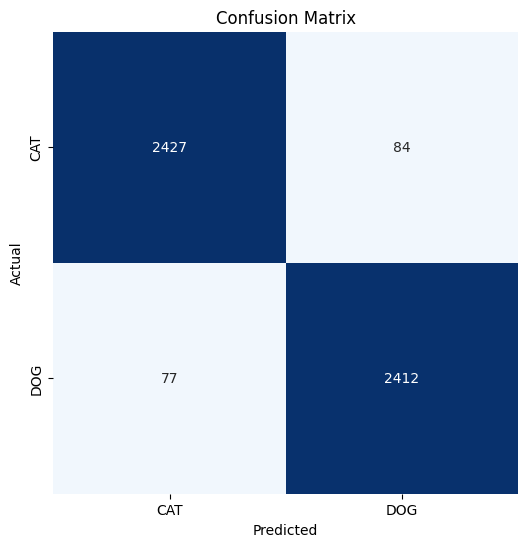

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.97      0.97      0.97      2511
         DOG       0.97      0.97      0.97      2489

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [ ]:
cm = confusion_matrix(test_iterator.labels, predictions, labels=[0, 1])
clr = classification_report(test_iterator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
ZO_loss = zero_one_loss(test_iterator.labels, predictions)

In [ ]:
print("Zero-one Loss: ", ZO_loss)

Zero-one Loss:  0.032200000000000006


In [ ]:
# Define k-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_df, test_df in kfold.split(input_path, label):

# Define the model architecture
    base_model = MobileNetV2(input_shape=(Image_Width,Image_Height,3),
                                               include_top=False,
                                               weights='imagenet')
    base_model.trainable = False

    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    prediction_layer = tf.keras.layers.Dense(1)

    Model = Sequential([base_model,global_average_layer,prediction_layer
]) 


  # Compile the model
    base_learning_rate = 0.0001
    Model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = Model.fit(train_iterator,epochs = initial_epochs,validation_data=validation_iterator)

  # Generate generalization metrics
    scores = Model.evaluate(test_iterator)
    predictions = (Model.predict(test_iterator) >= 0.5).astype(np.int)
    zero_oneloss = zero_one_loss(test_iterator.labels, predictions)
    print(f'Score for fold {fold_no}: {Model.metrics_names[0]} of {zero_oneloss}; {Model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(zero_oneloss*100)
    

  # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
563/563 [==============================] - 149s 252ms/step - loss: 0.3012 - accuracy: 0.8516 - val_loss: 0.1577 - val_accuracy: 0.9380
Epoch 2/10
563/563 [==============================] - 135s 239ms/step - loss: 0.1405 - accuracy: 0.9417 - val_loss: 0.1372 - val_accuracy: 0.9440
Epoch 3/10
563/563 [==============================] - 135s 239ms/step - loss: 0.1216 - accuracy: 0.9500 - val_loss: 0.1219 - val_accuracy: 0.9500
Epoch 4/10
563/563 [==============================] - 140s 248ms/step - loss: 0.1141 - accuracy: 0.9522 - val_loss: 0.1108 - val_accuracy: 0.9485
Epoch 5/10
563/563 [==============================] - 131s 232ms/step - loss: 0.1084 - accuracy: 0.9544 - val_loss: 0.1124 - val_accuracy: 0.9495
Epoch 6/10
563/563 [==============================] - 134s 238ms/step - loss: 0.1062 - accuracy: 0.9548 - val_loss: 0.1071 - val_accuracy: 0.9535
Epoch 7/10
563/563 [=======

In [ ]:
# == Average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 96.71199917793274
> Loss: 3.2880000000000025
------------------------------------------------------------------------


In [ ]:
## Proof

In [ ]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 1s 1s/step


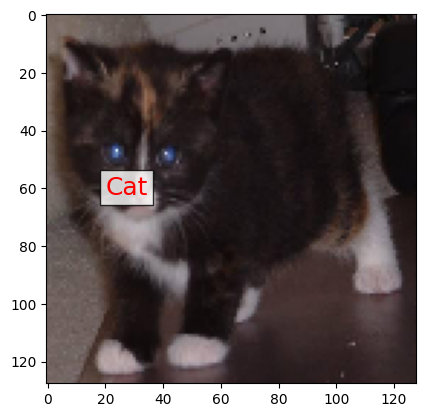

In [ ]:
img1 = image.load_img('/content/Downloads/CatsDogs/Cats/2546.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)
prediction = Model.predict(img, batch_size=32,steps=1)
if(prediction[:,:]>0.5):
    value ='Dog'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()